In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
#build the model

class Model():
    
    def __init__(self):
        
        self.a = 7
        self.b = 2
        self.c = 0
        
    def __call__(self, x):
        
        return self.a * (x)**2 + self.b * x + self.c

#initialize
model = Model()

In [35]:
#synthasize data
true_a = 3
true_b = 1
true_c = 4

#number of examples
num_examples = 1000

x = np.random.normal(0, 1, num_examples)
y = true_a * (x)**2 + true_b * x + true_c

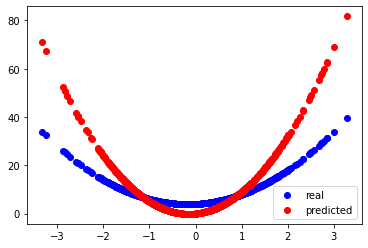

In [36]:
#function to plot data

def plot_data(inputs, outputs, predictions):
    
    plt.scatter(inputs, outputs, color = 'b')
    plt.scatter(inputs, predictions, color = 'r')
    plt.legend(['real', 'predicted'])
    plt.show()
    
#plot the current data
plot_data(x, y, model(x))

In [37]:
def grads(inputs, outputs, predictions):
    
    #calculate dL/da (calling it da)
    da = np.dot(np.square(inputs), 2 * (predictions - outputs))
    da = da/len(inputs)
    
    #calculate dL/db (calling it db)
    db = np.dot(inputs, 2*(predictions - outputs))
    db = db/len(inputs)
    
    #calculate dL/dc (calling it dc)
    dc = np.sum(predictions - outputs)
    dc = dc/len(inputs)
    
    return da, db, dc
    

In [45]:
#create a loss function. will use mean squared error
def loss(y_predicted, y_true):
    
    return np.mean(np.square(y_predicted - y_true))

def fit(model, inputs, outputs, learning_rate):
    
    #calculate the current loss
    current_loss = loss(outputs, model(inputs))
    
    #calculate the gradients for each variable in the model
    da, db, dc = grads(inputs, outputs, model(inputs))
    
    #update the parameters of the model
    model.a = model.a - learning_rate * da
    model.b = model.b - learning_rate * db
    model.c = model.c - learning_rate * dc
    
    return current_loss  

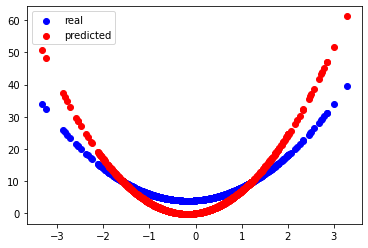

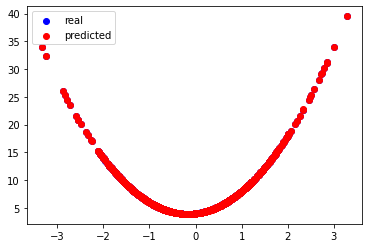

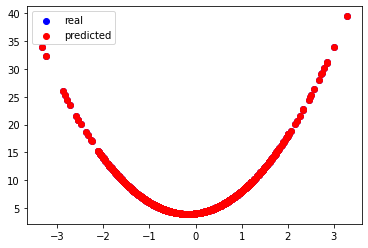

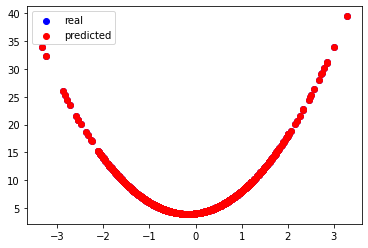

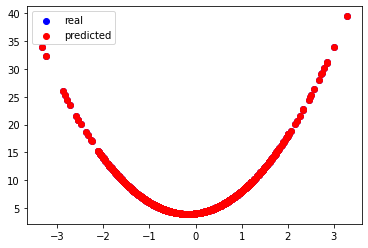

In [59]:
#train the model for 15 epochs

model = Model()

epochs = 500

#get a b and c
list_a, list_b, list_c = [], [], []
losses = []

for epoch in range(epochs):
    
    list_a.append(model.a)
    list_b.append(model.b)
    list_c.append(model.c)
        
    current_loss = fit(model, x, y, 0.1)
    losses.append(current_loss)
    
    if epoch % 100 == 0:
        
        plot_data(x, y, model(x))
    

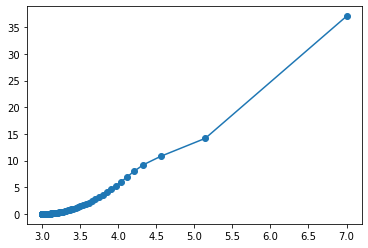

In [60]:
plt.plot(list_a, losses)
plt.scatter(list_a, losses)